# `Data Visualization `
**Using Matplotlib and Seaborn**

### `Data Visualization`:
- It is a process of creating graphical representations of data to help understand and communicate insights.
- Data visualization can be used to identify trends, patterns, and correlations in data.
- Give visual context to information , making it easier to understand and analyze.
- A complex idea can be broken down into a simple and clear visual representation.

### `Importance of Data Visualization`
- Data is only useful **if it can be understood and interpreted.**
- It diliver data with **efficiency, clarity and effectiveness**.
- It helps to **identify trends and patterns** in data like `correlations`, `outliers`, `seasonality`, `frequency`, and `distribution`.
- Analyse **large datasets** and make informed decisions.

<br>

`Correlation`: A relationship between two variables where the value of one variable is associated with the value of the other variable.

# `Matplotlib`
- `matplotlib` is a plotting library for Python that provides a comprehensive set of tools for creating high-quality 2D and 3D plots.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000, 2010, 2020],
       'Exchange Rate': [65, 69, 71, 64, 62, 59, 72, 71, 75, 78, 81]}

In [5]:
df = pd.DataFrame(Data)

In [6]:
df

,Year,Exchange Rate
0,1920,65
1,1930,69
2,1940,71
3,1950,64
4,1960,62
5,1970,59
6,1980,72
7,1990,71
8,2000,75
9,2010,78


<Axes: xlabel='Year'>

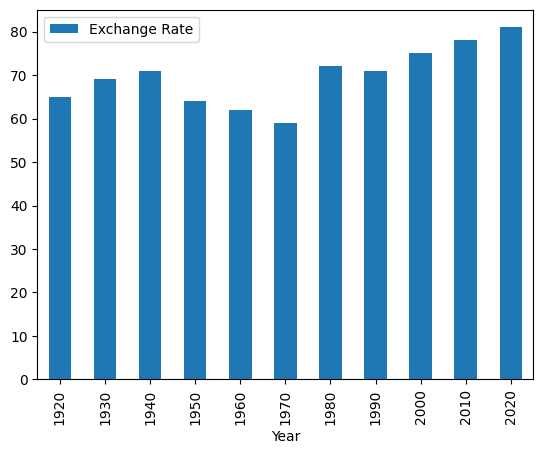

In [9]:
df.plot(x = 'Year', y = 'Exchange Rate', kind = 'bar')

<Axes: xlabel='Year'>

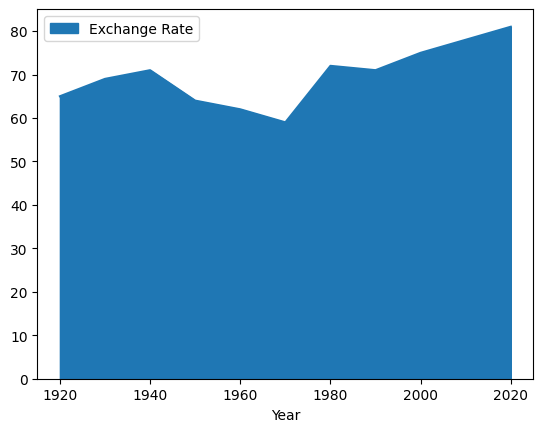

In [12]:
df.plot(x = 'Year', y = 'Exchange Rate', kind = 'area')

<Axes: xlabel='Year'>

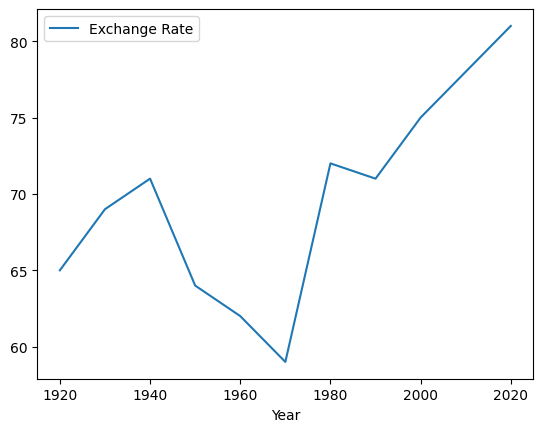

In [13]:
df.plot(x = 'Year', y = 'Exchange Rate', kind = 'line')

<Axes: ylabel='Year'>

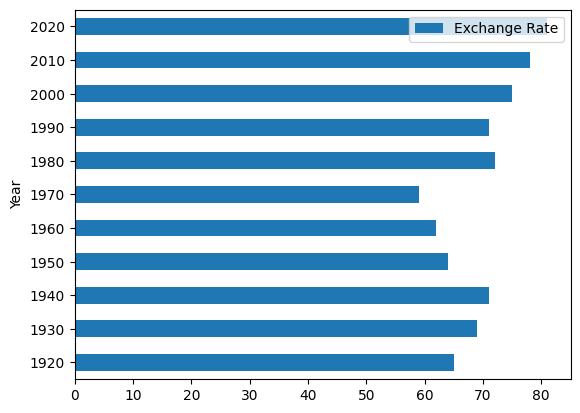

In [14]:
df.plot(x = 'Year', y = 'Exchange Rate', kind = 'barh')

<Axes: xlabel='Year', ylabel='Exchange Rate'>

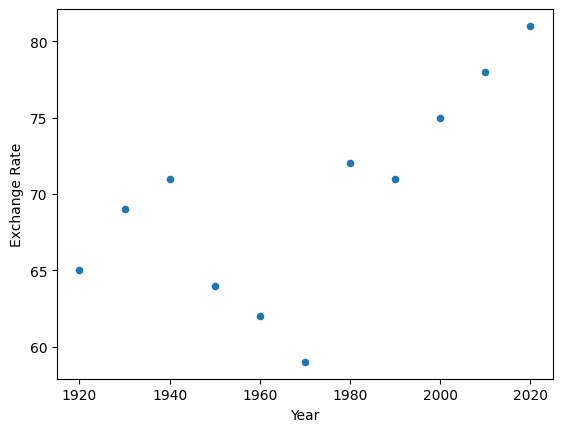

In [15]:
df.plot(x = 'Year', y = 'Exchange Rate', kind = 'scatter')

<Axes: >

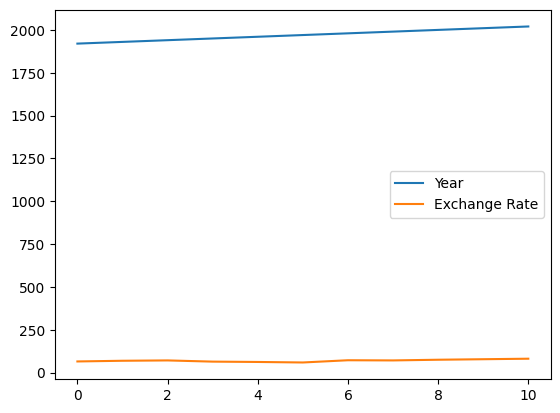

In [ ]:
df.plot() # pandas plot method

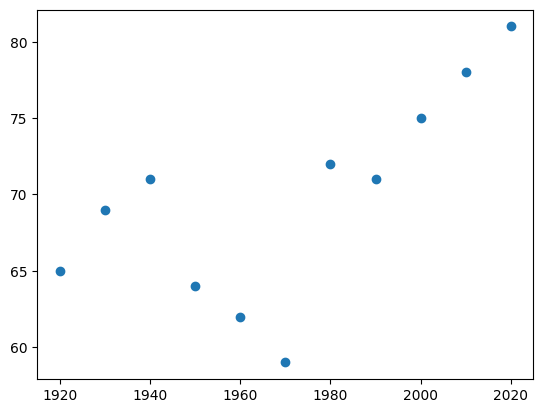

In [22]:
plt.scatter(df['Year'], df['Exchange Rate'])
plt.show()

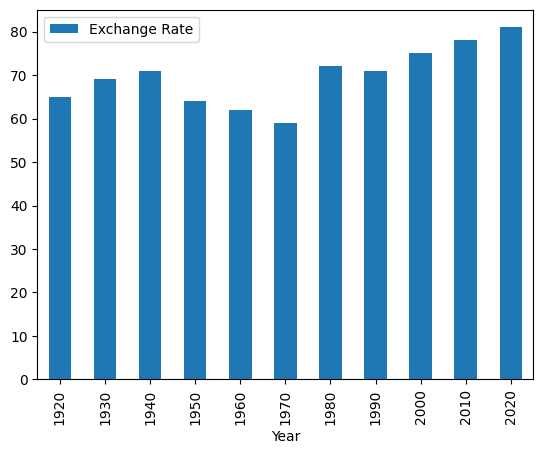

In [23]:
df.plot(x = 'Year', y = 'Exchange Rate', kind = 'bar')
plt.show()

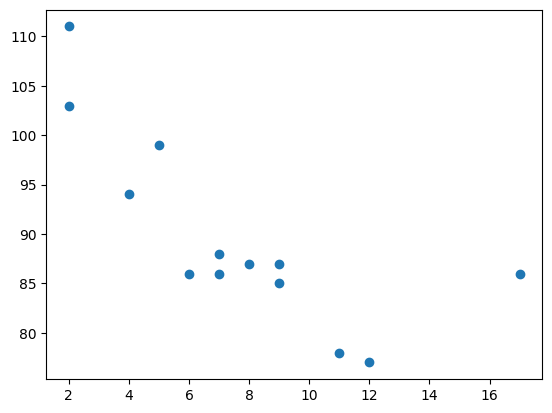

In [24]:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y)
plt.show()

In [25]:
Data = {'Tasks': [100,500,300]}

In [26]:

df = pd.DataFrame(Data, columns = ['Tasks'], index = ['Pending', 'Completed', 'Ongoing'])
df.head(5)

,Tasks
Pending,100
Completed,500
Ongoing,300


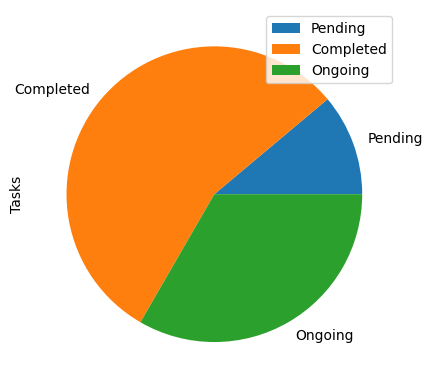

In [28]:
df.plot.pie(y='Tasks')
plt.show()

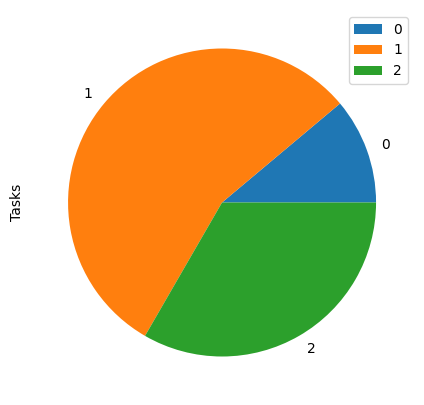

In [29]:
df = pd.DataFrame(Data, columns = ['Tasks'])

df.plot.pie(y='Tasks', figsize=(5,5))
plt.show()

In [32]:
df = pd.read_csv('uncleaned_customer_data_with_numerics.csv')

In [33]:
df.head()

,CustomerID,Name,Email,Age,Country,SignupDate,LastLogin,TotalPurchase,Feedback,CartValue,ItemsBought,DiscountApplied,AvgPurchaseValue
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Edwin Mack,timothy14@ward.com,unknown,NaN,2023-10-18,2025-02-14 03:26:26,80.63,Excellent,196.06,NaN,5.0,NaN
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Kimberly Moore,brendagonzalez@atkins.org,75,USA,2025-02-28,2025-02-17 15:38:32,27.38,NaN,136.79,NaN,0.0,NaN
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Kaitlin Gregory,velazquezanita@yahoo.com,30,Germany,2023-09-10,2025-02-01 15:53:26,817.67,Bad,239.65,NaN,20.0,NaN
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Crystal Gill,allentyler@hill-smith.com,NaN,United States,NaN,2025-05-07 21:17:28,29.28,NaN,291.47,NaN,10.0,NaN
4,e443df78-9558-467f-9ba9-1faf7a024204,William Martinez,jonesashley@gmail.com,NaN,United States,2024-09-12,2025-05-07 13:32:36,829.67,Average,NaN,NaN,15.0,NaN


In [34]:
df.Feedback.value_counts()

Feedback
Good         61
Average      51
Bad          49
Excellent    46
Name: count, dtype: int64

<Axes: xlabel='Feedback'>

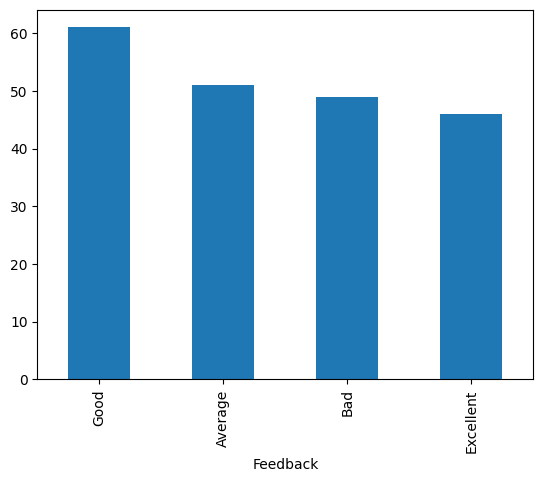

In [36]:
df.Feedback.value_counts().plot(kind='bar')

In [37]:
df.Feedback.value_counts()/len(df)*100

Feedback
Good         19.677419
Average      16.451613
Bad          15.806452
Excellent    14.838710
Name: count, dtype: float64

<Axes: ylabel='count'>

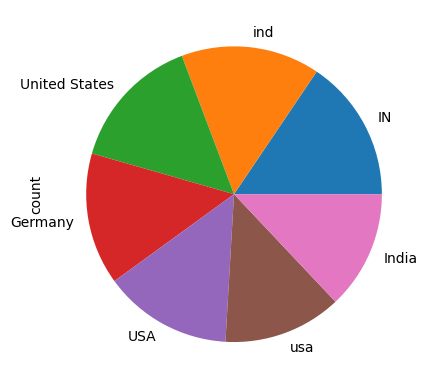

In [41]:
df.Country.value_counts().plot(kind='pie')

here `USA`,`usa`, `United States` are same country put its treated as different because Python is `Case sensitive`<br>
So we have to clean the data by converting all the text to their correct country name.

In [42]:
df['Country'] = df['Country'].replace('usa', 'United States')
df['Country'] = df['Country'].replace('USA', 'United States')
df['Country'] = df['Country'].replace('IN', 'India')
df['Country'] = df['Country'].replace('ind', 'India')

<Axes: ylabel='count'>

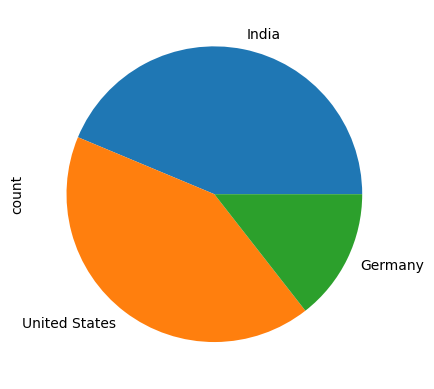

In [43]:
df.Country.value_counts().plot(kind='pie')

Much better

<Axes: ylabel='count'>

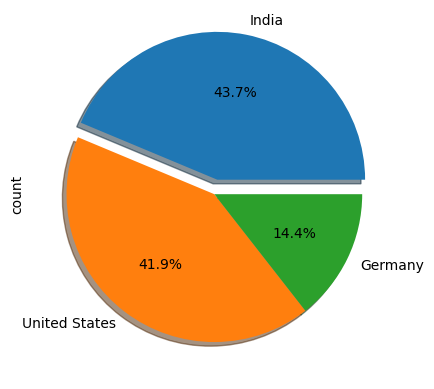

In [51]:
country_counts = df['Country'].value_counts()
explode = [0.1 if country == 'India' else 0 for country in country_counts.index]
country_counts.plot(kind='pie',
    explode=explode, # to offset the 'India' slice
    autopct='%1.1f%%', # to display the percentage
    shadow=True
)

In [44]:
df.Country.value_counts()

Country
India            118
United States    113
Germany           39
Name: count, dtype: int64

<Axes: >

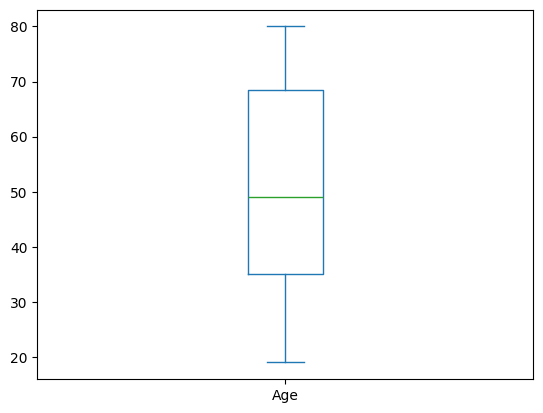

In [46]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].plot.box()

# `Seaborn`
- `seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- `seaborn` is built on top of `matplotlib` and `pandas` and is used for creating informative and attractive statistical graphics.


In [63]:
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris(as_frame=True) 
# as_frame=True is used to convert the data into a pandas DataFrame

In [65]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [ ]:
df = iris.frame
# df = iris.frame convert to proper data frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### `Kde plot`
- `KDE` stands for Kernel Density Estimation.
- It is a non-parametric method for estimating the underlying probability density function of a given data set.

<Axes: xlabel='sepal length (cm)', ylabel='Density'>

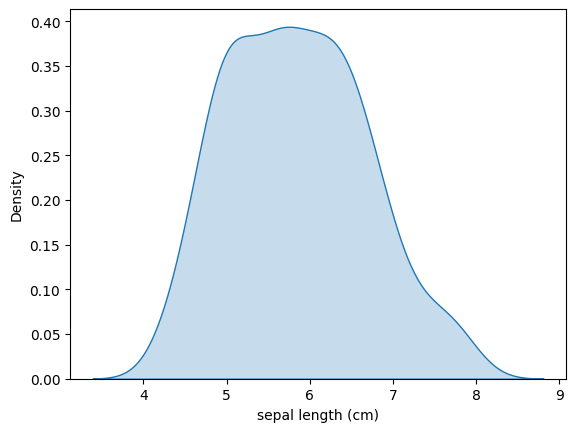

In [72]:
sns.kdeplot(df['sepal length (cm)'], fill=True)

In [75]:
species = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

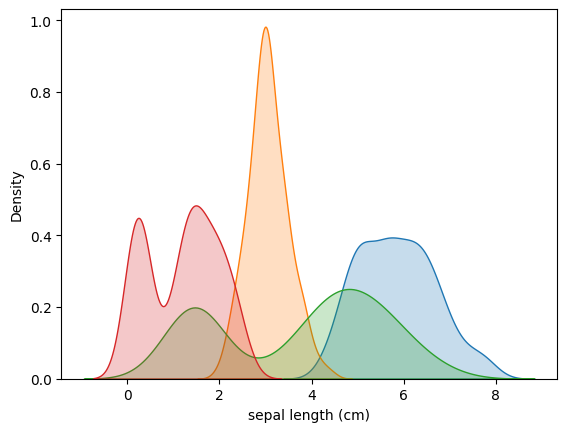

In [77]:
for col in species:
    sns.kdeplot(df[col], fill=True)

/Users/manharankaur/Desktop/Coding/Repository_AI_ML_DL/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


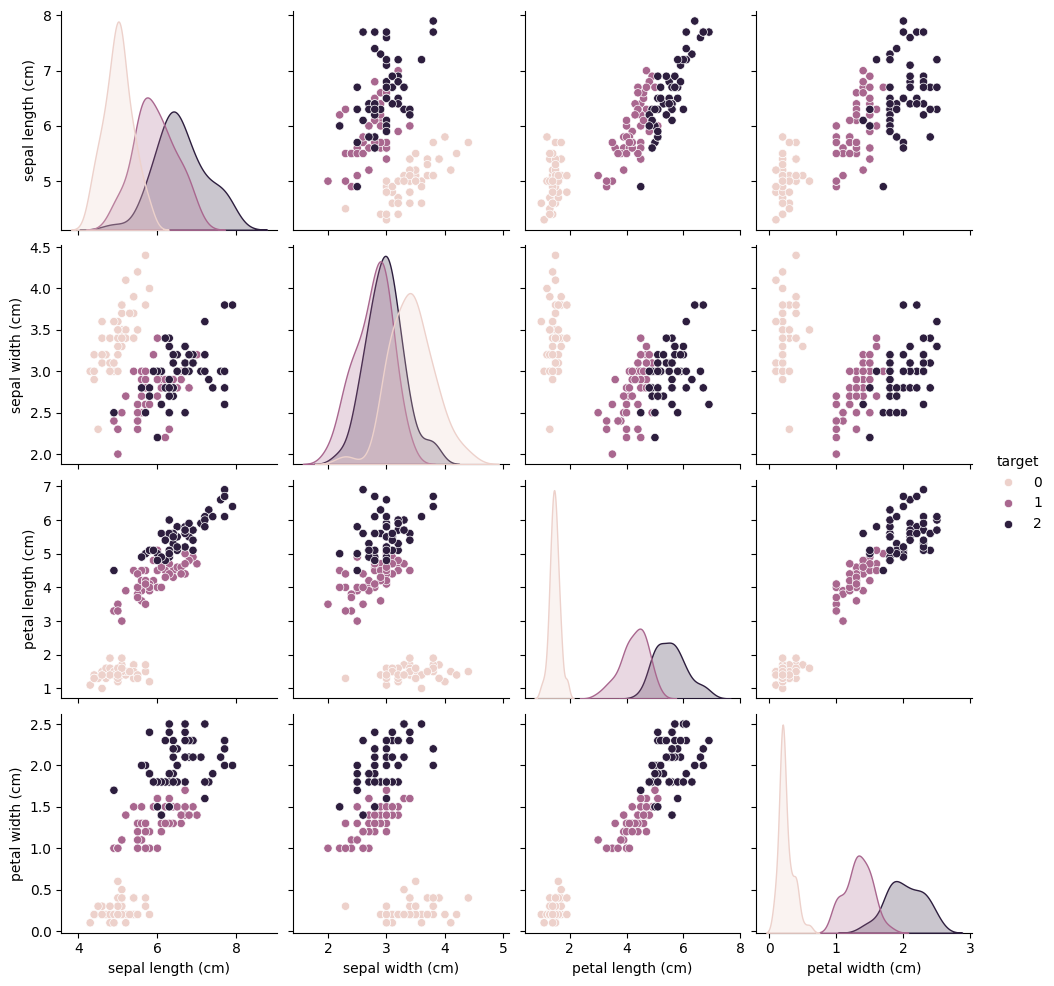

In [83]:
sns.pairplot(df, size=2.5, hue='target')